# Density Estimation

Density estimation is the process to estimate the distribution of the data given a finite set $x_1 , . . . , x_N$ of
observations. It should be emphasized that the problem of density estimation is fundamentally ill-posed, because there are infinitely many probability distributions that could have given rise to the observed finite data set. The aim of these methods is to create a predictor of new points given the observed data.


## Parametric vs Nonparametric models:

We can classify these models in two main classes parametric and non-parametric models. The parametric models they are governed by a small number of adaptive parameters, such as the mean and variance in the case of a Gaussian for example. To apply such models to the problem of density estimation, we need a procedure for determining suitable values for the parameters, given an observed data set. One limitation of the parametric approach is that it assumes a specific functional form for the distribution, which may turn out to be inappropriate for a particular application or data. An alternative approach is given by nonparametric density estimation methods in which the form of the distribution typically depends on the size of the data set. Such models still contain parameters, but these control the model complexity rather than the form of the distribution.

Parametrics methods: Bernoulli, Multinomial and Gaussian

Nonparametrics methods: histograms, nearest-neighbours, and kernels.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from src import parametric_models as pm
from scipy import stats as st

## Distributions

### Bernoulli Distribution

Bernoulli is a distribution for binary random variables where its outcome $x \in \{0,1\}$ and it is governed by the parameter $\mu$ that can be seen as the probability of a random variable $x$ beign equal to 1. So, that $P(x=1|\mu) = \mu$ and $P(x=0|\mu) = (1-\mu)$. Therefore we can define the Bernoully distribution of a bynary random variable $x$ as,

$$Bern(X|\mu) = P(X|\mu) = \mu^X(1-\mu)^{(1-X)}  $$
$$E[X] = \mu$$
$$ Var[X] = \mu(1-\mu)$$









Bernoulli distribution, given parameter mu = 0.3
Expectation = 0.3
Var = 0.21
Prob (0,1)= [ 0.7  0.3]


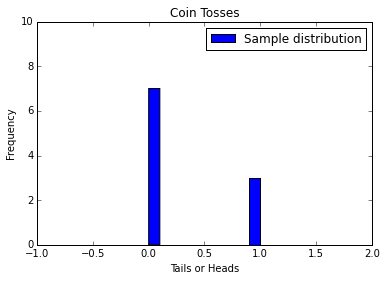

In [4]:
#Parameters - vary mu to see how the distribution behaves
N = 10; mu = 0.3

#using distribution
scipyBen = st.bernoulli(mu);
mean, var = st.bernoulli.stats(mu, moments='mv');                
pdf = scipyBen.pmf(np.array([0,1]));

#sampling from bernoulli
heads = np.ones((N*mu,), dtype=np.int);
tails = np.zeros((N*(1-mu),), dtype=np.int);
X = np.concatenate((heads, tails), axis = 0);


#Print metrics
print('Bernoulli distribution, given parameter mu = {}'.format(mu))
print('Expectation = {}'.format(mean));
print('Var = {}'.format(var));
print('Prob (0,1)= {}'.format(pdf));


#configure graph
plt.hist(X, facecolor='blue', label='Sample distribution');
plt.xlim([-1, 2]);
plt.ylim([0, N]);
plt.ylabel('Frequency');
plt.xlabel('Tails or Heads');
plt.title('Coin Tosses');
plt.legend(loc='upper right');
plt.show();


### Binomial

We can also work out the distribution of the number m of observations of x = 1, given that the data set has size N. This the binomial distribution and it is defined by mu (the probability of get x = 1) and N (the total number of trials).
\begin{equation}
Binomial(m|N, \mu) = binom\left(\frac{N}{m}\right) \mu^m (1- mu)^{N-m} \\
E[m] = N\mu  \\
Var[m] = N\mu(1-\mu)
\end{equation}

Binomial Distribution, given parameters (N, mu) = (10,0.3)
Expectation = 3.0
Var = 2.0999999999999996
Prob (m = 1:N)= [  1.21060821e-01   2.33474440e-01   2.66827932e-01   2.00120949e-01
   1.02919345e-01   3.67569090e-02   9.00169200e-03   1.44670050e-03
   1.37781000e-04   5.90490000e-06]


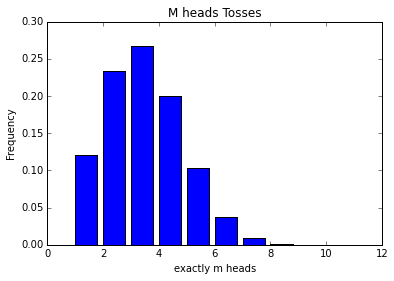

In [5]:
#Parameters - vary to see how it behaves
mu = 0.3; N = 10;

#Binomial metrics
scipyBin = st.binom(N, mu);
mean, var = st.binom.stats(N, mu, moments='mv');                
pdf = scipyBin.pmf(np.arange(1,N+1,1));

#Print metrics
print('Binomial Distribution, given parameters (N, mu) = ({},{})'.format(N,mu))
print('Expectation = {}'.format(mean));
print('Var = {}'.format(var));
print('Prob (m = 1:N)= {}'.format(pdf));

#configure graph
plt.bar(np.arange(1,N+1,1), pdf)
plt.ylabel('Frequency');
plt.xlabel('exactly m heads');
plt.title('M heads Tosses');
plt.show();


### Multinomial

Multinomial is a for discrete variables that can take on one of K possible mutually exclusive states. It is parametrized by the vector $\vec{\mu} = (\mu_0,...,\mu_k)^T$ Where $\sum_{k=1}^K \mu_k = 1$

$$Multinomial(k|\vec\mu) =  \mu_k$$
$$E[k] = N\mu_k$$
$$ Var[k] = N\mu_k(1-\mu_k)$$

Multinomial Distribution, given parameters (k, mu) = (5,[ 0.2  0.2  0.2  0.1  0.3])

Expectation([0,..,K-1]) = [ 2.  2.  2.  1.  3.]
Var([0,..,K-1]) = [ 1.6  1.6  1.6  0.9  2.1]
Prob (x = 1:K)= [ 0.2  0.2  0.2  0.1  0.3]


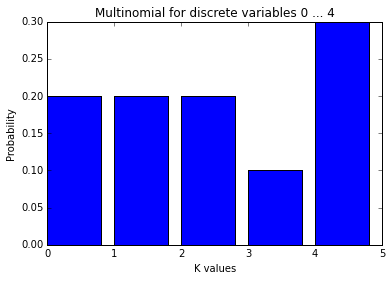

In [6]:
#Parameters - vary to see how it behaves
N = 10; K = 5; MU = np.array([0.2, 0.2, 0.2, 0.1, 0.3]);  

#Binomial metrics
mean = lambda n, k, mu: n*mu[k];
var = lambda n, k, mu: n*mu[k]*(1-mu[k]);
pdf = lambda x, k, mu: mu[x];
x = np.arange(0,K,1);

#Print metrics
print('Multinomial Distribution, given parameters (k, mu) = ({},{})\n'.format(K,MU))
print('Expectation([0,..,K-1]) = {}'.format(mean(N, x, MU)));
print('Var([0,..,K-1]) = {}'.format(var(N, x, MU)));
print('Prob (x = 1:K)= {}'.format(pdf(x , K, MU)));

#configure graph
plt.bar(x, pdf(x , K, MU))
plt.ylabel('Probability');
plt.xlabel('K values');
plt.title('Multinomial for discrete variables 0 ... {}'.format(K-1));
plt.show();


### Univariate and Multivariate Gaussian

The Gaussian, also known as the normal distribution, is a widely used model for the distribution of continuous variables. In the case of a single variable x, the Gaussian distribution can be written in the form,

$$P(x | \mu, \sigma)=\frac{1}{\sqrt{2\pi }\sigma}\exp \left\{ -\frac{1}{2} \frac{\left(x-\mu\right)^2}{\sigma^2} \right\}$$

where $\mu$ is the mean and $\sigma^2$ is the variance. For a D-dimensional vector x, the multivariate Gaussian distribution takes the form,

$$P(x | \mu, \Sigma)=\frac{1}{\sqrt{(2\pi)^D|\Sigma|}}
\exp\left(-\frac{1}{2}({x}-{\mu})^T{\Sigma}^{-1}({x}-{\mu})
\right)$$

where $\mu$ is a D-dimensional mean vector, $\Sigma$ is a $D × D$ covariance matrix, and |Σ| denotes the determinant of Σ.

#### Limitations of Gaussians

* Unimodal: It has just one maximum therefore produces bad results for multimodal data. This can be overcomed with mixture of gaussian models.
* Sucevtivel to noise: Outliers in the data prejudice drastically. Student T distributions is more robust than gaussians in that case.
* In MLE variance is biased by the sample mean. However we can use a laplace smooth to overcome this problem.

Univariate Gaussian Distribution, given parameters (mu, variance) = (5,1)
Expectation([0,..,K-1]) = 5.0
Var([0,..,K-1]) = 1.0
Prob (x = mu)= 0.3989422804014327 (maximum)


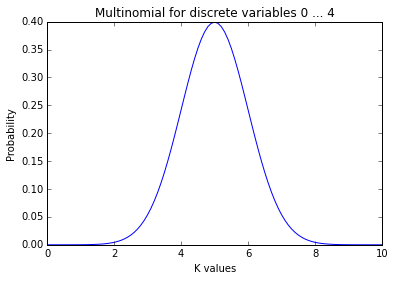

In [7]:
#Parameters - vary to see how it behaves ! univariate case the behaviour repeats in the high dimenssion space
sigma = 1; mu = 5;

#Univariate gaussian
x = np.arange(0,10.1,0.1);
scipyNorm = st.norm(loc=mu, scale=np.sqrt(sigma));
mean, var = st.norm.stats(loc=mu, scale=np.sqrt(sigma), moments='mv');                
pdf = scipyNorm.pdf(x);

#Print metrics
print('Univariate Gaussian Distribution, given parameters (mu, variance) = ({},{})'.format(mu, sigma));
print('Expectation([0,..,K-1]) = {}'.format(mean));
print('Var([0,..,K-1]) = {}'.format(var));
print('Prob (x = mu)= {} (maximum)'.format(scipyNorm.pdf(mu)));

#configure graph
plt.plot(x, pdf)
plt.ylabel('Probability');
plt.xlabel('K values');
plt.title('Multinomial for discrete variables 0 ... {}'.format(K-1));
plt.show();

##Fitting to the data

In parametric models we have two options to infer its parameters from the data, the frenquentist approach and the bayesian approach. In a frequentist treatment, we choose specific values for the parameters by optimizing some criterion, such as the likelihood function. By contrast, in a Bayesian treatment we introduce prior distributions over the parameters and then use Bayes’ theorem to compute the corresponding posterior distribution given the observed data. The frequntist using MLE are subject of over-fitting which is handled by the introduction of prior probabilities in the bayesian settings. However, the frequentist approach can overcome this problem using regularization and large data sets.


#### Frequntist Fitting of Bernoulli Distribution
In a frequentist setting, we can estimate a value for $\mu$ by maximizing the likelihood function, or equivalently by maximizing the logarithm of the likelihood given a set of finite observations. suppose we have a data set $D = \{x_1 , . . . , x_N \}$ of observed values of x. We can construct the likelihood function, which is a function of $\mu$, on the assumption that the observations are drawn independently from $P(x|\mu)$, and then maximizing the logarithm of this function by set the derivative of $ln(p(D|\mu))$ with respect to $\mu$ equal to zero, we obtain the maximum likelihood estimator (MLE) of $\mu$. The same procedure can be used to other distributions, but the math is harder.

$$ln(P(D|\mu) = \sum^N ln(p(x_n|\mu)) = \sum^N x_n ln(\mu) + (1-x_n)ln(1-\mu)$$
$$\mu_{ml} = \arg\!\max ln(P(D|\mu)) $$
$$\frac{\partial ln(P(D|\mu_ml) }{\partial \mu_ml} = 0 $$
$$\mu_{ml} = \frac{1}{N}\sum^n x_n$$

Suppose X is a random variable that represent a coin toss with heads $X = 1$ and tails $X = 0$. By the maximum likelihood estimator, the probability of landing heads is given by the fraction of observations of heads in the data set. For small datasets this approach is subject to overfitting, but when N tends to infinity (in fact large) it is equal to Bayesian approach. 

Binomial distribution:
Outcomes: Discrete integer
Num of observations: 10
Estimator: Estimator.MLE
Expec: 7.00
Var: 2.10


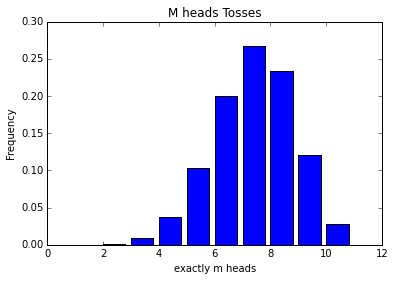

In [8]:
#Change the data and see how it behaves
D = np.array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1]);N = D.size;

#fit Binomial to the data that is an combination of bernoulli
Ben = pm.Binomial(D);
X = np.arange(1,N+1,1)
pdf = Ben.prob(X);
print(Ben);

#configure graph
plt.bar(X, pdf)
plt.ylabel('Frequency');
plt.xlabel('exactly m heads');
plt.title('M heads Tosses');
plt.show();

### Bayesian

In order to develop a Bayesian treatment for this problem, we need to introduce a prior distribution $p(\mu)$
over the parameter $\mu$. We should choose one prior that when mutiplied by the likelihood produces a posteriori probability that have the same format of the prior. This property is called conjugancy. Thefore, the conjugate prior of the Bernoulli distribution is the Beta distribution that is defined for continuous values as follow,

$$Beta(\mu|a, b) = \frac{Γ(a + b)}{Γ(a)Γ(b)} \mu^{a-1}(1-\mu)^{b-1}$$
$$Γ(x) = x!$$
$$E[X] = \mu$$
$$ Var[X] = \mu(1-\mu)$$

The parameters a and b are often called hyperparameters because they control the distribution of the parameter $\mu$

Beta Distribution, given parameters (a, b) = (8,4)
Expectation() = 0.6666666666666666
Var() = 0.017094017094017096


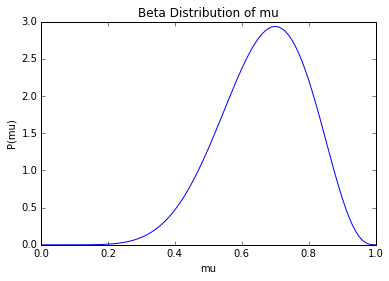

In [9]:
#Parameters - vary to see how it behaves ! 
a = 8; b = 4;

#Beta distributon
x = np.arange(0,1.01,0.01);
scipyBeta = st.beta(a,b);
mean, var = st.beta.stats(a, b, moments='mv');                
pdf = scipyBeta.pdf(x);

#Print metrics
print('Beta Distribution, given parameters (a, b) = ({},{})'.format(a, b));
print('Expectation() = {}'.format(mean));
print('Var() = {}'.format(var));

#configure graph
plt.plot(x, pdf)
plt.ylabel('P(mu)');
plt.xlabel('mu');
plt.title('Beta Distribution of mu');
plt.show();

The posterior distribution of $\mu$ is now obtained by multiplying the beta prior by the binomial likelihood function and normalizing. Keeping only the factors that depend on $\mu$, we see that this posterior distribution has the form,
$$Beta(\mu|a, b) = \frac{Γ(m + a + l + b)}{Γ(m + a)Γ(l + b)} \mu^{a + m-1}(1-\mu)^{b + l -1}$$
We see that it has the same functional dependence on μ as the prior distribution, reflecting the conjugacy properties of the prior with respect to the likelihood function. In summary it is another Beta distribution where $a = m + a_0$ and $b = l + b_0$, where $a_0$ and $b_0$ are our prior knowledge about the data. It naturally generates a sequential approach where we can start from our knowledge and update our distribution give certain amount of observations. Note that in the limit of an infinitely large data set m, l → ∞ the result reduces to the maximum likelihood result. it is a very general property that the Bayesian and maximum likelihood results will agree in the limit of an infinitely.

So, to predict the the posterior distribution we should average over all posible values of mu using the sum and product rules,
$$P(X=1|D) = \sum_0^1 P(x=1|mu)*p(mu|D) = Expec(mu|D)$$ obs:(not a sum, in fact it is a integration)




Binomial distribution:
Outcomes: Discrete integer
Num of observations: 10
Estimator: Estimator.BAYESIAN
Expec: 3.08
Var: 2.13


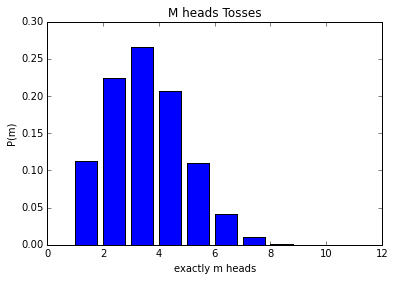

In [10]:
#Prior knowledge - vary to see the behaviour
a = 2; b = 1;

#Observations - Vary to see the behaviour
X = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1]); N = X.size;

#Fitt bernoulli using Bayesian Approach
Ben = pm.Binomial(a=a,b=b,est=pm.Estimator.BAYESIAN);

#observe data
Ben.update(X);
print(Ben);

#Show new distribution
X = np.arange(1,N+1,1)
pdf = Ben.prob(X);

#configure graph
plt.bar(X, pdf)
plt.ylabel('P(m)');
plt.xlabel('exactly m heads');
plt.title('M heads Tosses');
plt.show();



## From Density Estimator to predictor
Any density estimator can be turned into a classifier, and this holds true for the Gaussian density estimator. To build a Gaussian classifier, simply divide the data according to the value of the class variable, and learn a Gaussian P (x | c) for each class c. Also compute $P(C) = N_c/C$ of each class. Then, to classify a new point x, choose the class c that maximizes $P(C | X,D) = P(X | C,D) * P(C | D) $ (bayes theorem again).